In [1]:
state = 'WV' 
year = 2020

In [2]:
filepath = 'C:\\...
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [3]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [4]:
#warm_starts = [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 74, 76, 79, 80, 81, 84, 86, 89, 91, 92, 96], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98]], [[4, 8, 17, 30, 32, 35, 37, 40, 43, 49, 52, 64, 66, 70, 73, 89], [1, 2, 9, 12, 14, 19, 20, 21, 22, 23, 26, 27, 31, 33, 38, 41, 42, 46, 53, 55, 58, 59, 60, 62, 63, 65, 68, 71, 76, 78, 79, 84, 86, 91, 92, 93, 96, 97], [0, 5, 6, 10, 13, 16, 18, 29, 34, 36, 45, 48, 50, 51, 57, 69, 74, 75, 77, 80, 81, 85, 88, 94, 95], [3, 7, 11, 15, 24, 25, 28, 39, 44, 47, 54, 56, 61, 67, 72, 82, 83, 87, 90, 98]], [[4, 8, 10, 17, 37, 53, 62, 93], [0, 1, 2, 9, 12, 14, 16, 18, 20, 21, 22, 23, 26, 27, 31, 33, 38, 41, 42, 43, 46, 48, 49, 50, 58, 59, 60, 63, 65, 66, 68, 71, 73, 76, 78, 79, 84, 86, 92, 94, 95, 96, 97], [5, 6, 13, 19, 29, 30, 32, 34, 35, 36, 40, 45, 51, 52, 55, 57, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89, 91], [3, 7, 11, 15, 24, 25, 28, 39, 44, 47, 54, 56, 61, 67, 72, 82, 83, 87, 90, 98]], [[2, 8, 21, 22, 27, 48, 53, 60, 68, 71, 76, 78, 79, 92, 93, 94], [0, 5, 7, 11, 13, 15, 30, 32, 34, 35, 36, 40, 43, 50, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90, 91], [1, 4, 6, 9, 14, 16, 17, 19, 20, 23, 29, 31, 33, 37, 41, 42, 49, 51, 55, 58, 59, 62, 63, 65, 66, 73, 75, 84], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 45, 46, 47, 54, 61, 67, 83, 85, 86, 95, 96, 97, 98]], [[4, 8, 10, 17, 37, 53, 62, 93], [0, 1, 2, 6, 9, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 48, 49, 50, 52, 55, 58, 59, 60, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92], [3, 18, 28, 34, 38, 45, 46, 54, 67, 75, 83, 85, 88, 94, 95, 98], [5, 7, 11, 12, 13, 15, 24, 25, 26, 29, 36, 39, 44, 47, 51, 56, 57, 61, 69, 72, 74, 77, 80, 82, 86, 87, 90, 96, 97]], [[4, 8, 10, 17, 37, 53, 62, 93], [6, 15, 25, 28, 34, 45, 47, 61, 72, 83, 85, 88, 98], [0, 5, 7, 11, 13, 16, 19, 29, 30, 32, 35, 36, 40, 43, 49, 50, 51, 52, 55, 56, 57, 63, 64, 66, 69, 70, 73, 74, 75, 77, 80, 81, 82, 87, 89, 90, 91], [1, 2, 3, 9, 12, 14, 18, 20, 21, 22, 23, 24, 26, 27, 31, 33, 38, 39, 41, 42, 44, 46, 48, 54, 58, 59, 60, 65, 67, 68, 71, 76, 78, 79, 84, 86, 92, 94, 95, 96, 97]], [[4, 8, 10, 17, 18, 46, 48, 78, 94], [3, 12, 24, 25, 26, 38, 39, 44, 47, 54, 60, 67, 68, 71, 72, 76, 86, 87, 93, 96, 97, 98], [6, 7, 11, 13, 15, 28, 29, 34, 45, 51, 56, 61, 69, 75, 77, 80, 82, 83, 85, 88, 90, 95], [0, 1, 2, 5, 9, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 73, 74, 79, 81, 84, 89, 91, 92]], [[2, 8, 10, 16, 18, 38, 46, 48, 60, 68, 71, 76, 78, 94, 95], [0, 1, 4, 9, 14, 17, 19, 20, 21, 22, 23, 27, 31, 33, 37, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 65, 66, 73, 79, 84, 92, 93], [5, 6, 7, 11, 13, 29, 30, 32, 34, 35, 36, 40, 45, 51, 56, 57, 63, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89, 90, 91], [3, 12, 15, 24, 25, 26, 28, 39, 44, 47, 54, 61, 67, 72, 82, 83, 86, 87, 96, 97, 98]], [[2, 8, 12, 21, 22, 41, 46, 48, 60, 68, 71, 76, 78, 86, 93, 94, 96], [6, 7, 11, 15, 29, 34, 45, 50, 51, 56, 61, 72, 75, 77, 82, 83, 85, 87, 88, 90], [3, 4, 10, 16, 18, 24, 25, 26, 28, 38, 39, 44, 47, 54, 67, 95, 97, 98], [0, 1, 5, 9, 13, 14, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 69, 70, 73, 74, 79, 80, 81, 84, 89, 91, 92]], [[2, 3, 8, 12, 38, 46, 48, 54, 60, 67, 68, 71, 76, 78, 83, 86, 94, 95, 96], [15, 24, 25, 26, 39, 44, 47, 61, 72, 88, 97, 98], [4, 5, 6, 7, 10, 11, 13, 16, 18, 28, 29, 34, 36, 45, 51, 56, 57, 64, 69, 74, 75, 77, 80, 81, 82, 85, 87, 90], [0, 1, 9, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 63, 65, 66, 70, 73, 79, 84, 89, 91, 92, 93]], [[1, 2, 8, 20, 21, 22, 27, 41, 53, 59, 60, 71, 79, 92, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 4, 5, 9, 10, 14, 16, 17, 18, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 58, 62, 63, 64, 65, 66, 70, 73, 74, 81, 84, 89, 91], [6, 7, 11, 13, 15, 29, 34, 45, 50, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[4, 6, 8, 10, 16, 18, 93], [5, 7, 11, 13, 15, 34, 45, 51, 56, 61, 69, 72, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 21, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 60, 67, 68, 71, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 17, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 73, 79, 81, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 93], [5, 7, 11, 13, 15, 29, 34, 50, 51, 56, 61, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 21, 24, 25, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 67, 71, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 17, 19, 20, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 73, 74, 79, 81, 84, 89, 91, 92]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [3, 6, 10, 12, 13, 18, 24, 26, 28, 29, 34, 38, 39, 44, 45, 46, 48, 54, 67, 75, 83, 85, 86, 94, 95, 96, 97, 98], [5, 7, 11, 15, 25, 47, 51, 56, 61, 69, 72, 77, 80, 82, 87, 88, 90]], [[0, 4, 8, 10, 16, 17, 18, 43, 49, 50, 66], [1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 70, 71, 73, 74, 79, 81, 84, 89, 91, 92, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[4, 6, 8, 10, 16, 17, 49, 93], [5, 7, 11, 13, 15, 29, 34, 36, 45, 50, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92]]]

In [5]:
obj_type = 'perimeter'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = None                # if you have user define warm strats else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [6]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state WV, objective perimeter
####################################################################################################

L = 887890 and U = 905826

****************************************
Trying deviation = 8968.58
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CP


Solution count 10: 27.596 27.9434 28.3451 ... 36.5756

Optimal solution found (tolerance 0.00e+00)
Best objective 2.759596830143e+01, best bound 2.759596830143e+01, gap 0.0000%

User-callback calls 1622, time in user-callback 0.27 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 1, 2, 4, 8, 13, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 43, 45, 49, 50, 52, 54], [3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]]

****************************************
Trying deviation = 2963.75
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 893895 and U = 899821
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to 

Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1625 rows, 1300 columns and 4787 nonzeros
Model fingerprint: 0xbeabf420
Variable types: 330 continuous, 970 integer (970 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [3e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 936 rows and 650 columns
Presolve time: 0.01s
Presolved: 689 rows, 650 columns, 2148 nonzeros
Variable types: 0 continuous, 650 integer (650 binary)

Root rela

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1625 rows, 1300 columns and 4787 nonzeros
Model fingerprint: 0x55270b61
Variable types: 330 continuous, 970 integer (970 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [3e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 936 rows and 650 columns
Presolve time: 0.01s
Presolved: 689 rows, 650 columns, 2148 nonzeros
Variable types: 0 contin


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1625 rows, 1300 columns and 4787 nonzeros
Model fingerprint: 0x7881bfc2
Variable types: 330 continuous, 970 integer (970 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [3e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 936 rows and 650 columns
Presolve time: 0.02s
Presolved: 689 rows, 650 columns, 2148 nonzeros
Variable types: 0 continuous, 650 integer (650 binary)

Root relaxation: objective 2.376409e+01, 234 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   23.76409    0   59          -   23.76409      -     -    0s
     0     0   23.90251    0   62          -   23.90251      -     -    0s
     0     0   24.062

     0     0   24.39183    0   77          -   24.39183      -     -    0s
     0     0   24.41678    0   81          -   24.41678      -     -    0s
     0     0   24.42043    0   84          -   24.42043      -     -    0s
     0     0   24.56549    0   97          -   24.56549      -     -    0s
     0     0   24.58529    0  117          -   24.58529      -     -    0s
     0     0   24.58574    0  122          -   24.58574      -     -    0s
     0     0   24.58574    0  121          -   24.58574      -     -    0s
     0     0   24.58815    0  120          -   24.58815      -     -    0s
     0     0   24.59119    0  128          -   24.59119      -     -    0s
     0     0   24.59290    0  137          -   24.59290      -     -    0s
     0     0   24.59331    0  141          -   24.59331      -     -    0s
     0     0   24.62149    0  136          -   24.62149      -     -    0s
     0     0   24.62306    0  133          -   24.62306      -     -    0s
     0     0   24.62392  

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
if state == "ME":
    infeasible_region = [0, 750]
elif  state == "NM":
    infeasible_region = [0, 1354]
else:
    infeasible_region = None

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]


####################################################################################################
Pareto Frontier for state WV,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 1, 2, 5, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 45, 46, 49, 50, 52, 54], [3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 51, 53]], [[0, 2, 6, 7, 17, 19, 21, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 42, 45, 50, 51], [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 27, 30, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49, 52, 53, 54]], [[0, 2, 4, 8, 13, 15, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36

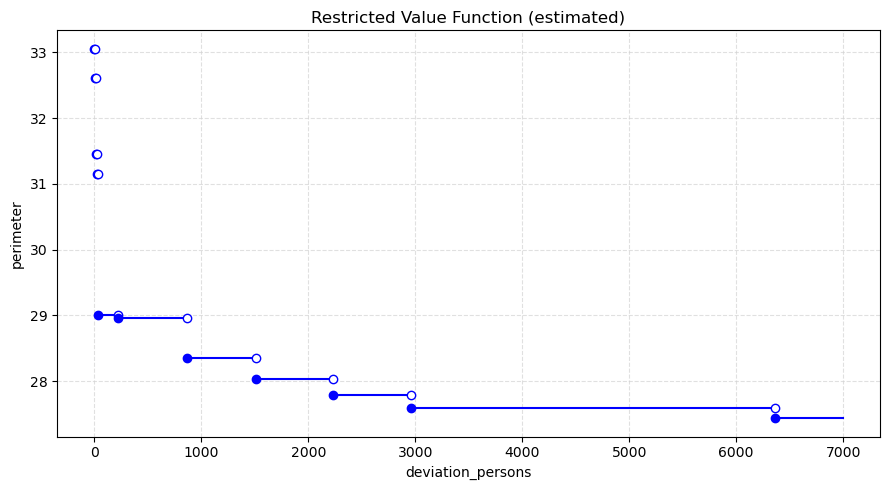

In [11]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
            
        # Add the plan and its objective values to the Pareto frontier
        pareto.add_plan(plan, upper_bound, lower_bound)
            
# Print the Pareto frontier plans and objective values
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds)
    
#extra_points: list of tuples, each containing (deviation, objective_value, label)
if state == 'WV' and year == 2010:
    
    #2010 enacted map scores
    enacted_map_deviation = 3197.333333333372
    enacted_map_scores = {'inverse_Polsby_Popper': 7.75, 'cut_edges': 34.00, 
                                      'perimeter': 42.12, 'average_Polsby_Popper': 0.14,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 1
    Cooper_plan_1_deviation = 323.66666666662786
    Cooper_plan_1_scores = {'inverse_Polsby_Popper': 7.31, 'cut_edges': 34.00, 
                                      'perimeter': 40.53, 'average_Polsby_Popper': 0.17,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 2
    Cooper_plan_2_deviation = 232.66666666662786
    Cooper_plan_2_scores = {'inverse_Polsby_Popper': 8.18, 'cut_edges': 36.00, 
                                      'perimeter': 43.36, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    # Cooper plan 3
    Cooper_plan_3_deviation = 115.66666666662786
    Cooper_plan_3_scores = {'inverse_Polsby_Popper': 7.25, 'cut_edges': 35.00, 
                                      'perimeter': 40.65, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    extra_points = [
                (enacted_map_deviation,  enacted_map_scores[obj_type], 'Enacted Map'),
                (Cooper_plan_1_deviation,  Cooper_plan_1_scores[obj_type] , 'Cooper plan 1'),
                (Cooper_plan_2_deviation,  Cooper_plan_2_scores[obj_type], 'Cooper plan 2'),
                (Cooper_plan_3_deviation, Cooper_plan_3_scores[obj_type], 'Cooper plan 3'),
                        ]
    
    #extra_colors: list of colors corresponding to the points in extra_points
    extra_colors = ['r', 'g', 'c', 'y']  # Red, Green, Cyan, Yellow for each of the extra points
    
    for ep in extra_points:
        print(f"The {ep[2]} has an objective value of {ep[1]} and a deviation of {ep[0]}.")
else:
    extra_points = None
    extra_colors = None
        
pareto.tighten_lower_bounds()
    
if infeasible_region != None:
        
    # Get the max values for setting the limits
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_ce = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[0, max_dev+100]
    o2lim=[0, max_ce*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(splits=None,o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region, extra_points=extra_points, extra_colors=extra_colors)  


####################################################################################################
Pareto maps for state WV,  objective perimeter
####################################################################################################



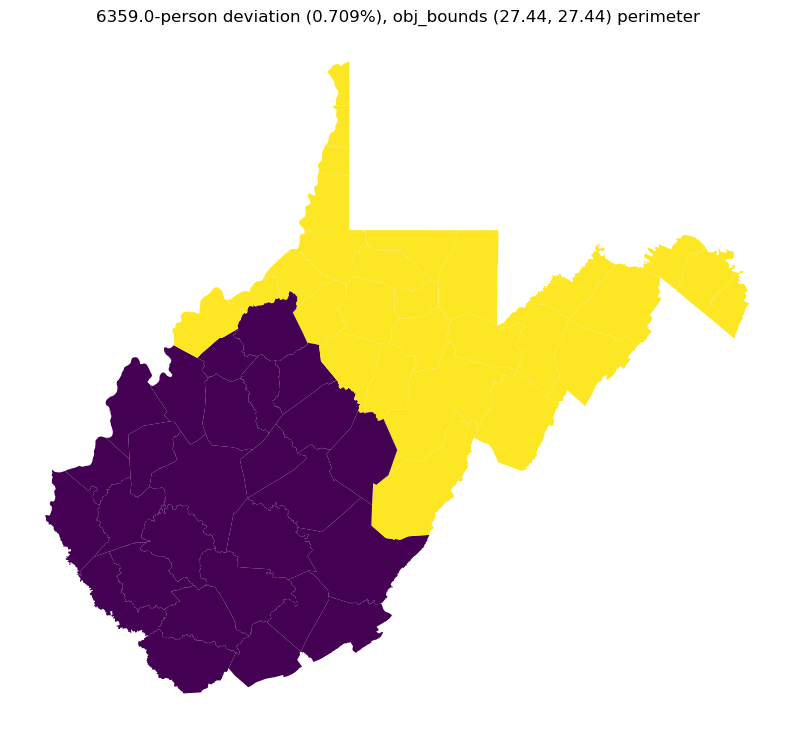

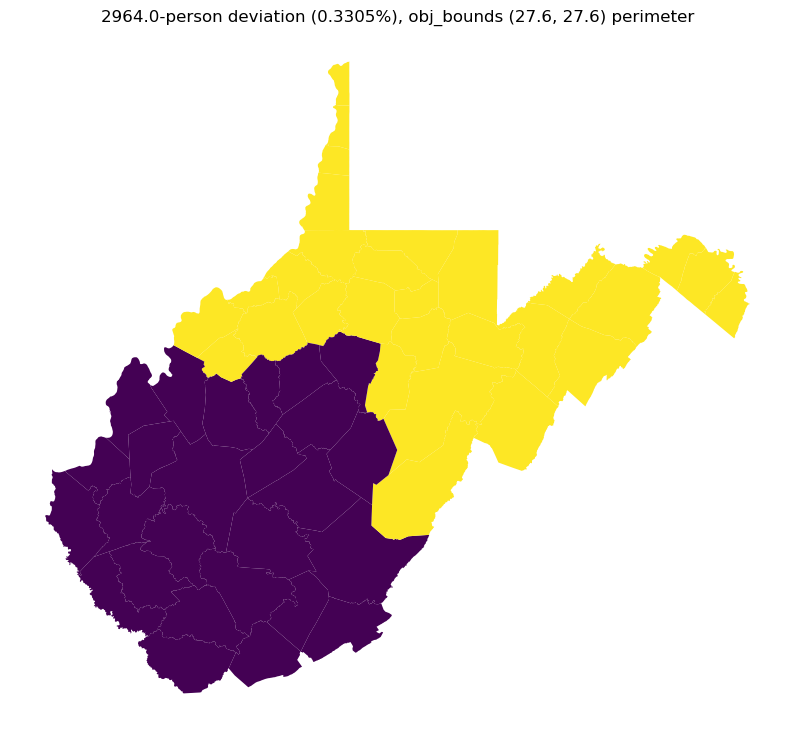

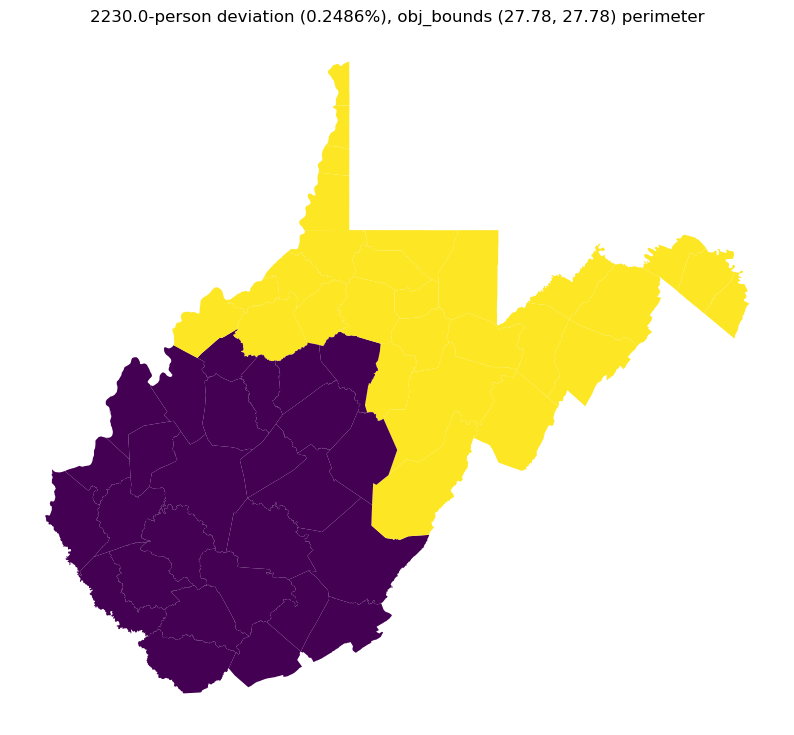

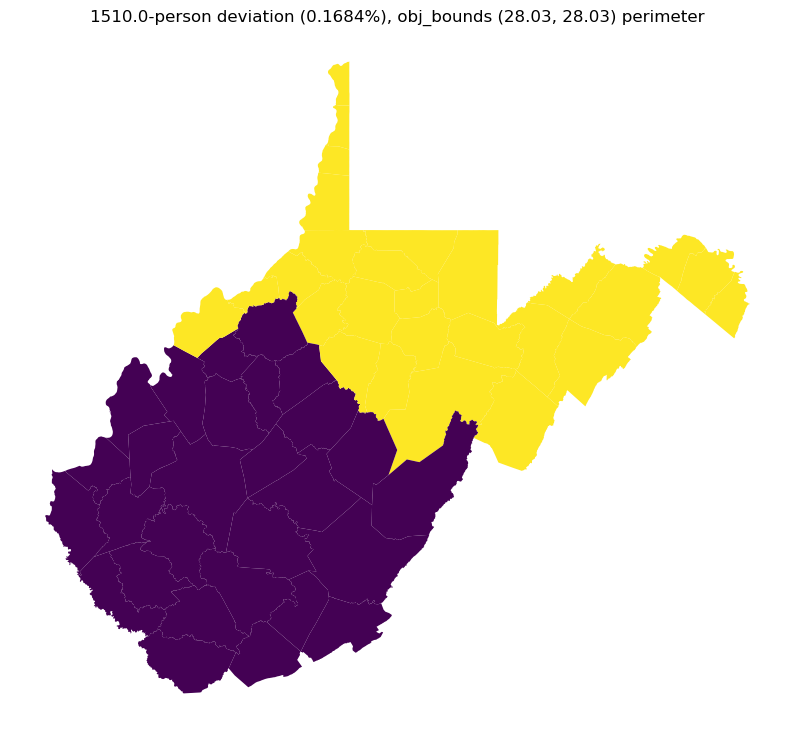

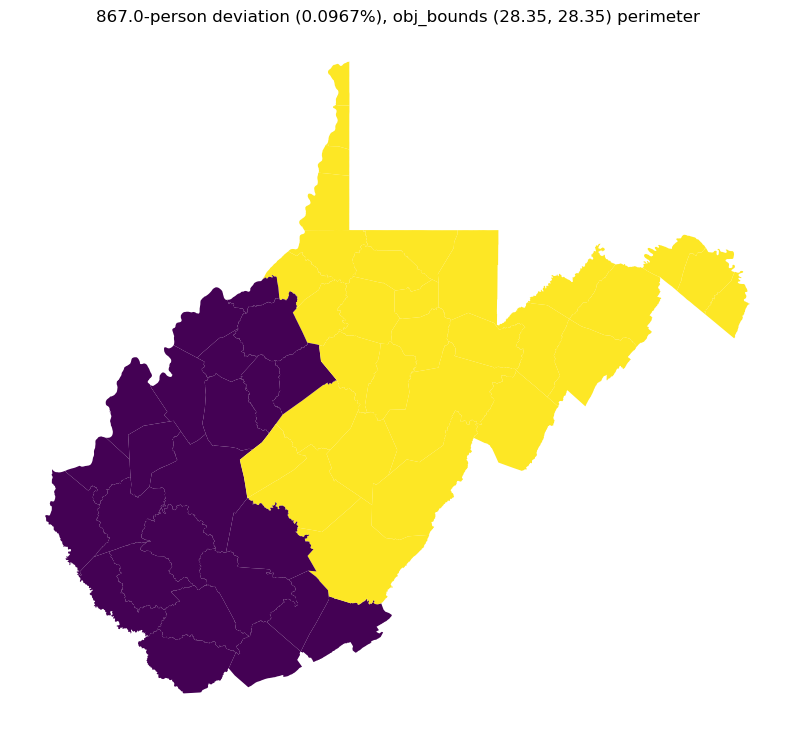

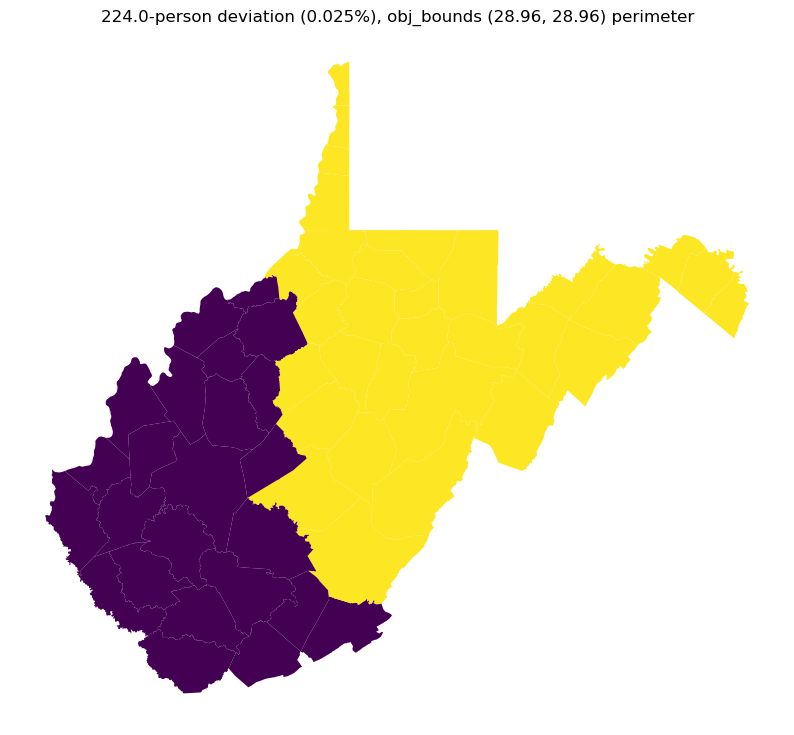

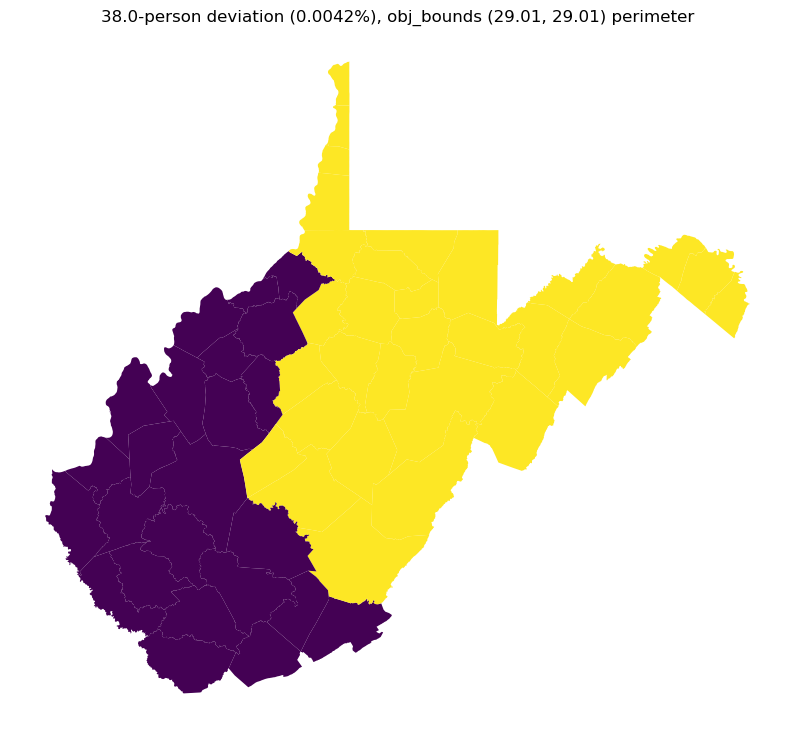

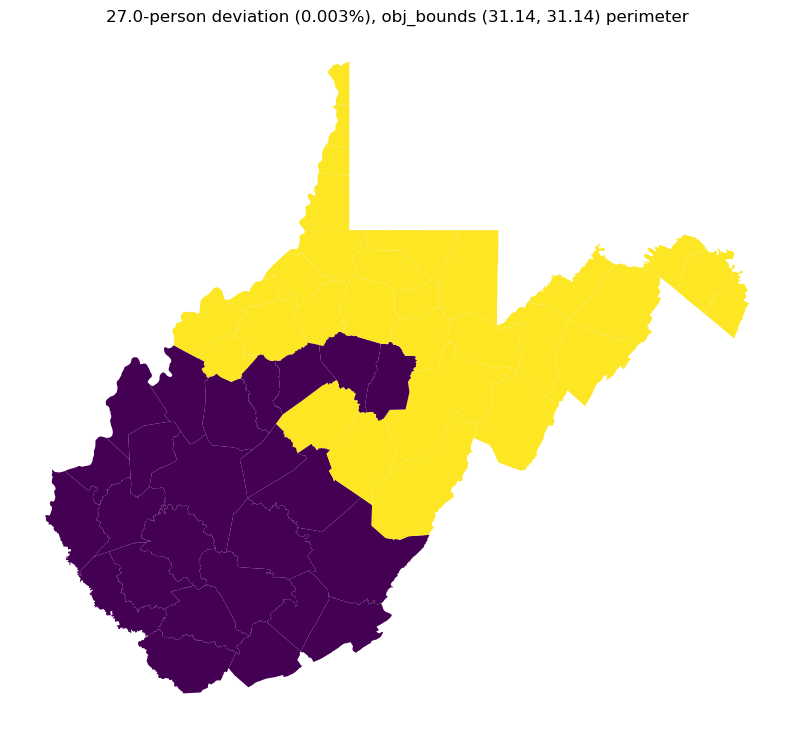

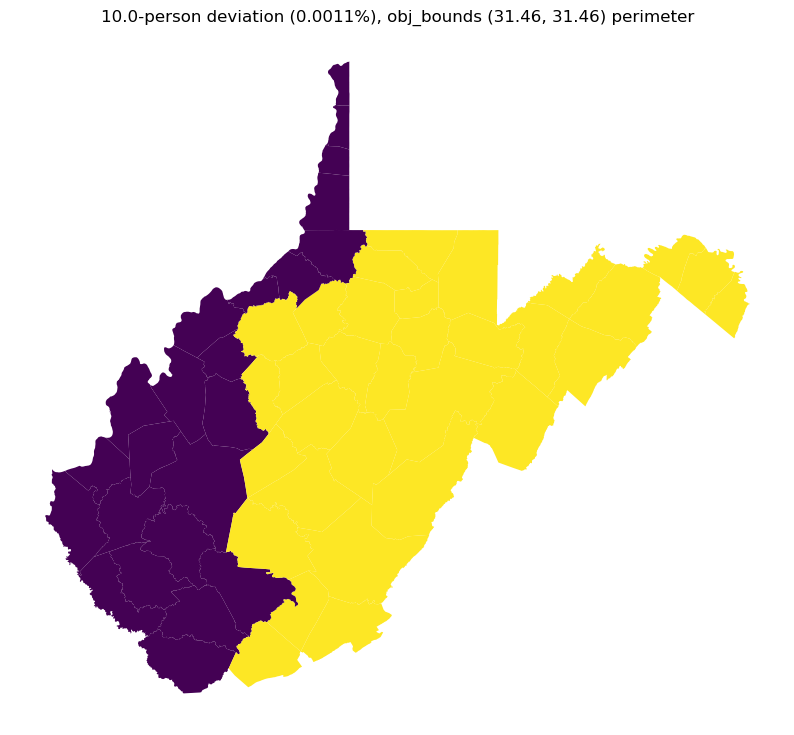

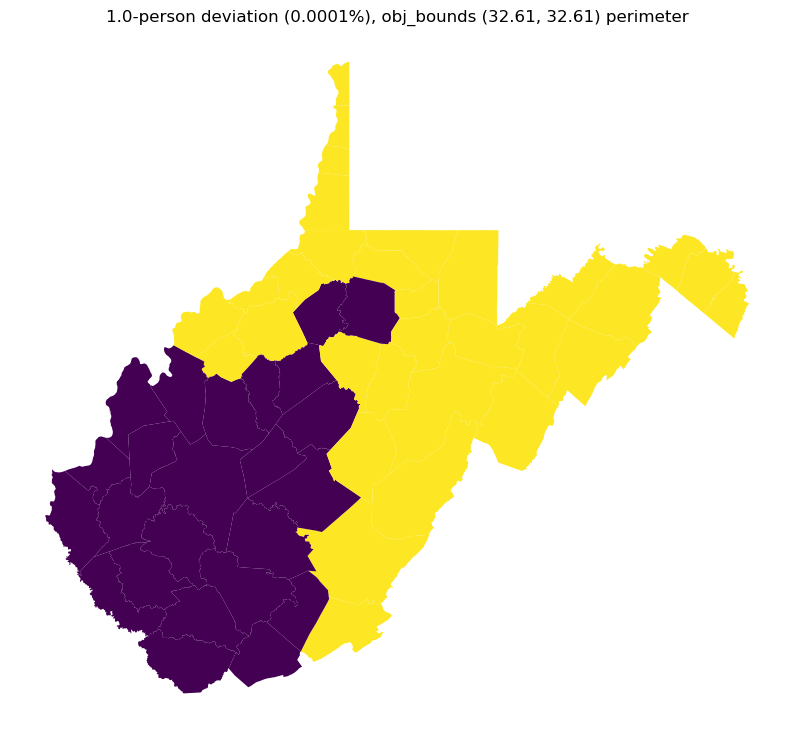

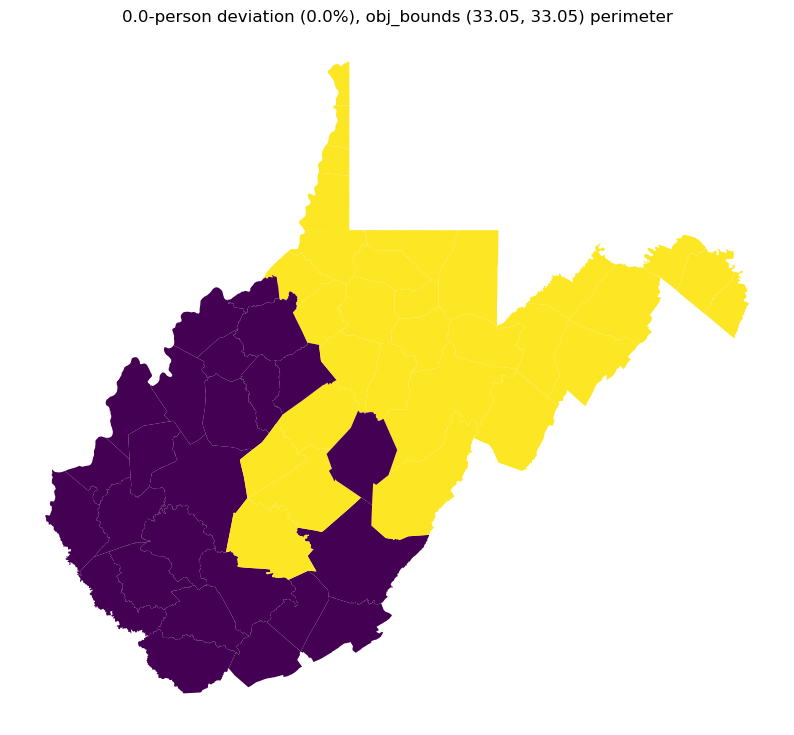

In [12]:
from draw import*

print(f"\n{'#' * 100}\nPareto maps for state {state},  objective {obj_type}\n{'#' * 100}\n")   
for plan, obj_bound, dev in result:
    title = f"{round(dev,2)}-person deviation ({round(100*dev/G._ideal_population,4)}%), obj_bounds {(round(obj_bound[0],2),round(obj_bound[1],2))} {obj_type}"
    draw_plan( filepath, filename2, G, plan, title=title, year=year )